In [57]:
from pymongo import MongoClient
from datetime import datetime
import pandas as pd

In [58]:
db_config = {
    'host' : '172.31.98.107:27017,172.31.98.190:27017,172.31.98.6',
    'username' : 'admin',
    'password' : 'y3aJOBqfxsHu',
    'port' : 27017,
    'connectTimeoutMS' : 3000
}
database_name = 'xindong'

In [59]:
# mongodb session
db_ = MongoClient(**db_config)[database_name]

In [32]:
collect_name = 'media'
media_data = list(db_[collect_name].find())
dat = pd.DataFrame(media_data)
used_media = set(dat[dat['contentType'].isin([1,2])]['_id'])

In [76]:
len(used_media)

5011

<AxesSubplot: >

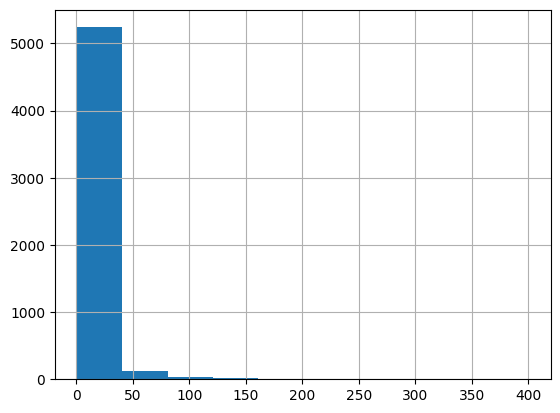

In [78]:
# query watch-duration data
collect_name = 'user_watch_duration'
all_watch_duration_data = list(db_[collect_name].find())
dat = pd.DataFrame(all_watch_duration_data)
dat = dat[dat['videoId'].isin(used_media)]

In [84]:
dat_ = dat.groupby(by=["userId"]).count()
dat_[['_id']].describe([i/10 for i in range(10)])

,_id
count,5422.000000
mean,9.366654
std,19.718790
min,1.000000
0%,1.000000
10%,1.000000
20%,2.000000
30%,2.000000
40%,3.000000
50%,4.000000


In [85]:
dat.shape

(50786, 6)

In [61]:
start_date = '2022-12-31'
start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
now_date_dt = datetime.now()
nosql_query = {
    'createdAt': {
            '$gte': start_date_dt,
            '$lt': now_date_dt
            }
}
watch_duration_data = list(db_[collect_name].find(nosql_query))
dat = pd.DataFrame(watch_duration_data)
used_user_set = set(dat[dat['videoId'].isin(used_media)]['userId'])

In [62]:
len(all_user_set & used_user_set) / len(all_user_set)

0.5111731843575419

In [63]:
len(all_user_set)

5370

In [64]:
len(used_user_set)

2771

In [39]:
min(dat['createdAt'])

Timestamp('2022-12-28 09:42:31.395000')

In [46]:
now_date_dt

datetime.datetime(2023, 1, 2, 14, 49, 53, 202626)

In [ ]:
'2023-01-01'
0.3016759776536313
-
'2022-12-31'
0.5111731843575419
-
'2022-12-30'
0.7219739292364991
-
'2022-12-29'
0.9070763500931098

In [72]:
start_date = '2022-12-28'
start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date = '2022-12-30'
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')
nosql_query = {
    'createdAt': {
            '$gte': start_date_dt,
            '$lt': end_date_dt
            }
}
watch_duration_data = list(db_[collect_name].find(nosql_query))
dat = pd.DataFrame(watch_duration_data)
used_user_setC = set(dat[dat['videoId'].isin(used_media)]['userId'])

In [ ]:
used_user_setA | ('2022-12-31', '2023-01-01')
used_user_setB | ('2022-12-30', '2022-12-31')
used_user_setC | ('2022-12-29', '2022-12-30')

In [75]:
len(used_user_setB & used_user_setC) / len(used_user_setB)

0.12481857764876633

In [70]:
len(used_user_setA)

1310

In [71]:
len(used_user_setB)

1378

In [74]:
len(used_user_setC)

1274

In [26]:
# query watch-duration data
collect_name = 'user_watch_duration'
all_watch_duration_data = list(db_[collect_name].find())
dat = pd.DataFrame(all_watch_duration_data)

In [40]:
collect_name = 'user_watch_duration'
all_watch_duration_data = list(db_[collect_name].find())
dat = pd.DataFrame(all_watch_duration_data)

In [41]:
min(dat['createdAt'])

Timestamp('2022-12-28 09:42:31.395000')

In [10]:
# given window and calculate cover rate

In [18]:
datetime.now()

datetime.datetime(2023, 1, 2, 14, 32, 13, 461156)

In [17]:
import pytz
zone_tz = pytz.timezone('Asia/Taipei')
date_dt = datetime.strptime(start_date, '%Y-%m-%d')
zone_tz.localize(date_dt).astimezone(pytz.utc)

datetime.datetime(2022, 12, 24, 16, 0, tzinfo=<UTC>)

In [15]:
all_watch_duration_data[:10]

[{'_id': ObjectId('63ac0f877ff01641a6e293dc'),
  'userId': 340660,
  'videoId': 96300,
  'totalDuration': 2.0,
  'parts': '[{"start":0,"end":2,"duration":2}]',
  'createdAt': datetime.datetime(2022, 12, 28, 9, 42, 31, 395000)},
 {'_id': ObjectId('63ac0f948bbca5bbefb9b468'),
  'userId': 340660,
  'videoId': 32968,
  'totalDuration': 2.0,
  'parts': '[{"start":0,"end":2,"duration":2}]',
  'createdAt': datetime.datetime(2022, 12, 28, 9, 42, 44, 516000)},
 {'_id': ObjectId('63ac0f9b8bbca5bbefb9b469'),
  'userId': 340660,
  'videoId': 92909,
  'totalDuration': 1.0,
  'parts': '[{"start":0,"end":1,"duration":1}]',
  'createdAt': datetime.datetime(2022, 12, 28, 9, 42, 51, 607000)},
 {'_id': ObjectId('63ac0fe87ff01641a6e293e8'),
  'userId': 340660,
  'videoId': 92909,
  'totalDuration': 2.0,
  'parts': '[{"start":0,"end":2,"duration":2}]',
  'createdAt': datetime.datetime(2022, 12, 28, 9, 44, 8, 837000)},
 {'_id': ObjectId('63ac0ff17ff01641a6e293ed'),
  'userId': 340660,
  'videoId': 92893,
  

In [ ]:
now_date = datetime.now().strftime('%Y-%m-%d')